#Assignment 2

Ignoring air resistance completely, write down the equations of motion for the cannonball 

In [ ]:
import math
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


In [ ]:
t0 = 0.0 #s
tf = 3.5 #s
n = 100
t_array = np.linspace(t0,tf,n)

v = 300.0 #m/s
theta = 50.0 #degrees
vx0 = (v * math.cos(theta))
vy0 = -(v * math.sin(theta))

x0 = np.array([0.0,vx0]) #[m, m/s]
y0 = np.array([0.0,vy0]) #[m, m/s]

# diameter = 15.0 cm
# density = 7.8 g/cm^3

# Equation to find Delta y is Delta_Y = V0y*t + half*g*t
# Equation to find Delta x is Detla_X = V0x*t

g = -9.8 #m/s

def proj_vac(t, a):
  x, y = a
  dx_dt = vx0 * t
  dy_dt = vy0 + (g * t)
  return dx_dt, dy_dt  

  #def proj_vac(def proj_vac(t, a):
  #x, y = a
  #fx = x0[0] + (x0[1])
  #fy = y0[0] + (half * g * t_array[0])
  #return fx, fy


Using Scipy (RK4(5) method) solve numerically 
x
(
t
)
 and 
y
(
t
)
 for 

In [ ]:
proj_RK45 = integrate.solve_ivp(proj_vac, (t0,tf), (0,0), method='RK45', t_eval=t_array)

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

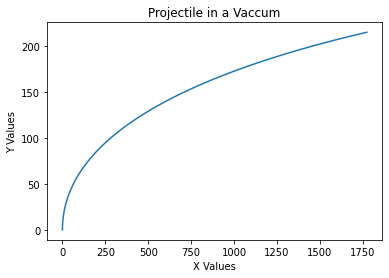

In [ ]:
fig, v = plt.subplots()

v.set_title("Projectile in a Vaccum")
v.set_xlabel("X Values")
v.set_ylabel("Y Values")
v.plot(proj_RK45.y[0], proj_RK45.y[1])

plt.show()

##Part - B

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part]. How does your Runge-Kutta 4th order evaluation compare to Scipy's RK4(5) method?

In [142]:
# I was having a particullarly difficult time with this assignment in general and ended up, unfortunatley, running out of time to really work this out. I kept getting errors about wrong shapes and was ahving a hard time visualizing what should be happening in this function.

# def rungekutta_45(f,t,x0, args=()):
#     n = len(t)
#     x = np.zeros((n,len(y0)))
#     x[0] = x0  
#     for i in range (0,n-1):      
#         dt = t[i+1]-t[i] 
#         h = int(dt/2)  
#         dt = int(dt)     
#         k1 = f(t[i],x[i],*args); 
#         k2 = f(t[i]+h, x[i] + h * k1, *args)
#         k3 = f(t[i]+h, x[i] + h * k2, *args)
#         k4 = f(t[i]+dt, x[i]+dt * k3, *args)
#         x[i+1] = x[i] +dt*k2
                
#     return x

run = rungekutta_45(proj_vac, (0,3.5), (0,0))



fig, r = plt.subplots()
r.set_title("Projectile in a Vaccum")
r.set_xlabel("time (s)")
r.set_ylabel("trajectory")
r.plot(proj_RK45.t, proj_RK45.y[0])
plt.show()

ValueError: ignored

## Part - C

Now include air resistance, but ignore the variation of atmospheric pressure [that is treat 
c
(
y
)
 as a constant that does not change with position, where 
c
=
γ
D
2
].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

In [134]:
# drag is Fd = Cd(density * v^2 * Area)/2 
#drag coefficient for sphere is 0.5


g = 9.8
density = 7.8 #g/cm^3
diameter = 15.0 #cm
r = diameter/2.0
pi = 3.14159
a = 4.0 * pi * r**2.0
cd = 0.5
#dy = (cd(density * (vy0**2) * a))/2 = mg
volume = 4.0*pi*(r**2.0)
m = density * volume
a_0 = 2*(m*g)/(cd*density*a)
# v_0 = np.array(v_0)
a1 = np.sqrt(a_0)

def proj_drag(t, b):
  x, y = b
  dx_dt = vx0 - (a1 * t)
  dy_dt = vy0 - (a1 * t)
  # dx_dt = vx0 * t
  # dy_dt = vy0 + (g * t)
  return dx_dt, dy_dt


Use Scipy (RK4(5) method) to solve numerically 
x
(
t
)
 and 
y
(
t
)
 for 0 <= t <= 3.5 s

In [135]:
proj_RK45_drag = integrate.solve_ivp(proj_drag, (t0,tf), (0,0), method='RK45', t_eval = t_array)

Plot the ball's trajecory and find it's horizontal range

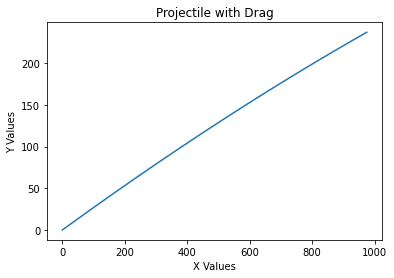

In [136]:
fig, d = plt.subplots()

d.set_title("Projectile with Drag")
d.set_xlabel("X Values")
d.set_ylabel("Y Values")
d.plot(proj_RK45_drag.y[0],proj_RK45_drag.y[1])

plt.show()

## Part- D

Now include the drag term with the atmospheric variation included [meaning 
c
(
y
)
=
γ
D
2
e
x
p
(
−
y
/
λ
)
]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

In [127]:
cd_y = 0.25 * ((density**2.0)**(-y0[0]/10000))
cd_x = 0.25 * ((density**2.0)**(-x0[0]/10000))

v_atmy = (2.0*(m*(g)))/(cd_y * density * a)
v_atmx = (2.0*(m*(g)))/(cd_x * density * a)
v_atmy1 = np.sqrt(v_atmy)
v_atmx1 = np.sqrt(v_atmx)

def proj_atm (t,c):
  x, y = c
  dx_dt = vx0 - (v_atmx1 * t)
  dy_dt = vy0 - (v_atmy1 * t)
  return dx_dt, dy_dt

Use Scipy (RK4(5) method) to solve numerically 
x
(
t
)
 and 
y
(
t
)
 for 0 <= t <= 3.5 s

In [128]:
proj_RK45_atm = integrate.solve_ivp(proj_atm, (t0,tf), (0,0), method='RK45',t_eval = t_array)

Plot the ball's trajectory and find it's horizontal range

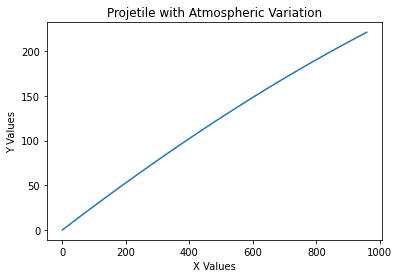

In [129]:
fig, a = plt.subplots()

a.set_title("Projetile with Atmospheric Variation")
a.set_xlabel("X Values")
a.set_ylabel("Y Values")
a.plot(proj_RK45_atm.y[0],proj_RK45_atm.y[1])

plt.show()

## Part - E

Plot the trajectories from parts a), c), and d) on the same plot.

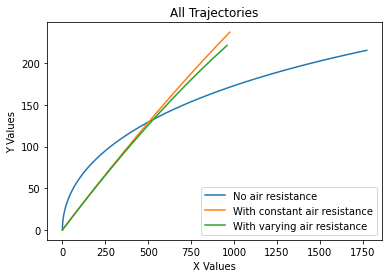

In [141]:
fig, all = plt.subplots()

all.set_title("All Trajectories")
all.set_xlabel("X Values")
all.set_ylabel("Y Values")
line1 = all.plot(proj_RK45.y[0],proj_RK45.y[1]) 
line2 = all.plot(proj_RK45_drag.y[0],proj_RK45_drag.y[1]) 
line3 = all.plot(proj_RK45_atm.y[0],proj_RK45_atm.y[1]) 
all.legend(['No air resistance', 'With constant air resistance', 'With varying air resistance'])

plt.show()

What impacts the motion more: turning on air resistance (i.e with 
c
(
0
)
) or turning on the variation with atmosphere (i.e. 
c
(
y
)
) ?

Answer: The constant resistance seemed to make a slightly bigger difference, but it is likely becuase my math is wrong that it is so dissimilar.